In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [3]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(filename, header=None)

In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers  # заменяем старые заголовки на новые
df.head(5)  # проверяем, всё ли сработало

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# Определение и обработка пропущенных значений
import numpy as np

df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Оценка отсутствующих данных</h4>

Отсутствующие значения преобразуются по умолчанию. Мы используем следующие функции для определения этих пропущенных значений. Существует два метода обнаружения недостающих данных:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
Результатом является логическое значение, указывающее, действительно ли значение, переданное в аргумент, является отсутствующими данными.



In [7]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h4>Подсчитайте пропущенные значения в каждом столбце</h4>
<p>
Используя цикл for в Python, мы можем быстро определить количество пропущенных значений в каждом столбце. Как указано выше, «True» представляет отсутствующее значение, а «False» означает, что значение присутствует в наборе данных. В теле цикла for метод ".value_counts()" подсчитывает количество "True" значений. 
</p>

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Исходя из приведенной выше сводки, каждый столбец содержит 205 строк данных и семь столбцов, содержащих отсутствующие данные:
<ol>
    <li>"normalized-losses": 41 отсутствующих значения</li>
    <li>"num-of-doors": 2 отсутствующих значения</li>
    <li>"bore": 4 отсутствующих значения</li>
    <li>"stroke" : 4 отсутствующих значения</li>
    <li>"horsepower": 2 отсутствующих значения</li>
    <li>"peak-rpm": 2 отсутствующих значения</li>
    <li>"price": 4 отсутствующих значения</li>
</ol>



<h3 id="deal_missing_values">Работа с отсутствующими данными</h3>
<b>Как быть с отсутствующими данными?</b>

<ol>
    <li>Удалить данные<br>
        a. Удалить весь ряд<br>
        b. Удалить всю колонку
    </li>
    <li>Заменить данные<br>
        a. Замените его по смыслу<br>
        b. Замените его по частоте<br>
        c. Замените его на основе других функций
    </li>
</ol>



<h4>Рассчитайте среднее значение для столбца "normalized-losses"</h4>

In [12]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Среднее значение нормированных потерь:", avg_norm_loss)

Среднее значение нормированных потерь: 122.0


<h4>Замените «NaN» средним значением в столбце "normalized-losses"</h4>

In [11]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Рассчитайте среднее значение для столбца "bore"</h4>

In [13]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


<h4>Замените "NaN" средним значением в столбце "bore"</h4>

In [17]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

<h4>На основе приведенного выше примера замените 'NaN' в столбце 'stroke' на среднее значение</h4>

In [20]:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)  # рассчитываем среднее значение для столбца 'stroke'

df["stroke"].replace(np.nan, avg_stroke, inplace = True)  # заменяем 'NaN' средним значением в столбце "stroke"

Average of stroke: 3.2554228855721337


<h4>Рассчитайте среднее значение для столбца "horsepower" </h4>

In [21]:
avg_horsepower=df['horsepower'].astype("float").mean(axis = 0)
print("Average of horsepower:", avg_horsepower)

Average of horsepower: 104.25615763546799


In [22]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [23]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


Чтобы увидеть, какие значения присутствуют в конкретном столбце, мы можем использовать метод ".value_counts()":

In [25]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Мы видим, что 'four' doors являются наиболее распространенным типом. Мы также можем использовать метод ".idxmax()" для автоматического вычисления наиболее распространенного типа:

In [26]:
df['num-of-doors'].value_counts().idxmax()

'four'

Процедура замены очень похожа на то, что мы видели ранее:

In [27]:
# замените отсутствующие значения 'num-of-doors' на наиболее часто встречающиеся
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Наконец, давайте отбросим все строки, в которых нет данных о ценах:

In [28]:
# просто отбросьте всю строку с "NaN" в столбце "price"
df.dropna(subset=["price"], axis=0, inplace=True)

# сбросить индекс, потому что мы удалили две строки
df.reset_index(drop=True, inplace=True)

In [29]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b>Хорошо!</b> Теперь у нас есть набор данных без пропущенных значений.

<h3 id="correct_data_format">Правильный формат данных</h3>

<p>Последним шагом в очистке данных является проверка и обеспечение того, чтобы все данные были в правильном формате (целое число, число с плавающей запятой, текст или другой формат).</p>

В Pandas, мы используем:

<p><b>.dtype()</b> для проверки типа данных</p>
<p><b>.astype()</b> для изминения типа данных</p>



<h4>Давайте перечислим типы данных для каждого столбца</h4>

In [31]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Как мы видим выше, некоторые столбцы имеют неправильный тип данных. Числовые переменные должны иметь тип «float» или «int», а переменные со строками, такие как категории, должны иметь тип «object». Например, переменные «диаметр» и «bore» — это числовые значения, описывающие двигатели, поэтому мы должны ожидать, что они будут иметь тип «float» или «int»; однако они отображаются как тип «object». Мы должны преобразовать типы данных в правильный формат для каждого столбца, используя метод astype().

<h4>Преобразование типов данных в правильный формат</h4>

In [32]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [34]:
df.dtypes  # перечислим столбцы после преобразования

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>Замечательно!</b>

Теперь мы, наконец, получили очищенный набор данных без пропущенных значений со всеми данными в правильном формате.

<h2 id="data_standardization">Стандартизация данных</h2>
<p>
Данные обычно собираются из разных агентств в разных форматах.
(Стандартизация данных также является термином для определенного типа нормализации данных, когда мы вычитаем среднее значение и делим на стандартное отклонение.)
</p>

<b>Что такое стандартизация?</b>

<p>Стандартизация — это процесс преобразования данных в общий формат, позволяющий исследователю проводить осмысленное сравнение.
</p>

<b>Пример</b>

<p>Преобразование миль/галлон в литров/100км:</p>
<p>В нашем наборе данных столбцы расхода топлива «city-mpg» и «highway-mpg» представлены в mpg (мили на галлон). Предположим, мы разрабатываем приложение в стране, которая принимает стандартный расход топлива в литров/100км.</p>
<p>Нам потребуется применить <b>преобразование данных</b> для преобразования миль/галлон в литров/100км.</p>


<p>Формула преобразования единиц измерения::<p>
L/100km = 235/mpg
<p>Мы можем выполнять многие математические операции непосредственно в Pandas.</p>

In [35]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [36]:
df['city-L/100km'] = 235/df["city-mpg"]  # преобразование

In [37]:
df.head()  # проверка изминений

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [38]:
# преобразование mpg в L/100km (235 разделить на mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# переименовать имя столбца из "highway-mpg" в "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# проверьте свои преобразованные данные 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


<h2 id="data_normalization">Нормализация данных</h2>

<b>Почему нормализация?</b>

<p>Нормализация — это процесс преобразования значений нескольких переменных в аналогичный диапазон. Типичные нормализации включают масштабирование переменной так, чтобы среднее значение переменной равнялось 0, масштабирование переменной, чтобы дисперсия равнялась 1, или масштабирование переменной, чтобы значения переменной находились в диапазоне от 0 до 1.
</p>

<b>Пример</b>

<p>Чтобы продемонстрировать нормализацию, допустим, мы хотим масштабировать столбцы «длина», «ширина» и «высота».</p>
<p><b>Цель:</b> нормализовать эти переменные, чтобы их значения находились в диапазоне от 0 до 1</p>
<p><b>Подход:</b> заменить исходное значение на (исходное значение)/(максимальное значение)</p>

In [40]:
# заменять (исходное значение) на (исходное значение)/(максимальное значение)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [41]:
# Согласно приведенному выше примеру нормализуйте столбец «высота»
df['height'] = df['height']/df['height'].max() 

# показать масштабированные столбцы
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Здесь мы видим, что мы нормализовали «длину», «ширину» и «высоту» в диапазоне [0,1].

<h2 id="binning">Binning</h2>
<b>Почему биннинг?</b>
<p>
    Биннинг — это процесс преобразования непрерывных числовых переменных в дискретные категориальные «ячейки» для группового анализа.
</p>

<b>Пример: </b>

<p>В нашем наборе данных «лошадиная сила» — это переменная с действительным значением в диапазоне от 48 до 288, имеющая 59 уникальных значений. Что, если нас интересует только разница в цене между автомобилями высокой, средней и малой мощности (3 типа)? Можем ли мы переставить их в три «корзины», чтобы упростить анализ? </p>

<p>Мы будем использовать метод pandas 'cut', чтобы разделить столбец «лошадиные силы» на 3 ячейки.</p>



<h3>Пример 'Binning' данных в Pandas</h3>

Преобразование данных в правильный формат:

In [42]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Давайте построим гистограмму лошадиных сил, чтобы увидеть, как выглядит распределение лошадиных сил.

Text(0.5, 1.0, 'horsepower bins / Лошадиные силы bins')

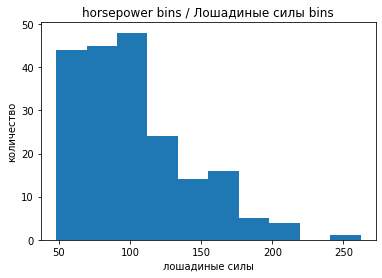

In [47]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# обозначим x/y абсцысы и название plot
plt.pyplot.xlabel("лошадиные силы")
plt.pyplot.ylabel("количество")
plt.pyplot.title("horsepower bins / Лошадиные силы bins")

<p>Нам нужны 3 бина с одинаковой пропускной способностью, поэтому мы используем 'numpy' <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Поскольку мы хотим включить минимальное значение лошадиных сил, мы хотим установить start_value = min(df["horsepower"]).</p>
<p>Поскольку мы хотим включить максимальное значение лошадиных сил, мы хотим установить end_value = max(df["horsepower"]).</p>
<p>Так как мы строим 3 бина одинаковой длины, разделителей должно быть 4, значит numbers_generated = 4.</p>

Мы строим массив ячеек с минимальным значением до максимального значения, используя пропускную способность, рассчитанную выше. Значения будут определять, когда заканчивается один бин и начинается другой.

In [48]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Задаем имена групп:

In [50]:
group_names = ['Low', 'Medium', 'High']

Мы применяем функцию 'cut', чтобы определить, чему принадлежит каждое значение `df['horsepower']`.

In [51]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Посмотрим количество автомобилей в каждом бине:

In [52]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Давайте построим распределение каждого бина:

Text(0.5, 1.0, 'horsepower bins / Лошадиные силы bins')

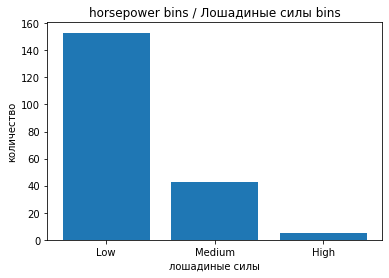

In [53]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# обозначим x/y абсцысы и название plot
plt.pyplot.xlabel("лошадиные силы")
plt.pyplot.ylabel("количество")
plt.pyplot.title("horsepower bins / Лошадиные силы bins")

<p>
     Внимательно посмотрите на кадр данных выше. Вы обнаружите, что в последнем столбце представлены ячейки для «лошадиных сил» на основе 3 категорий («Низкая», «Средняя» и «Высокая»).
</p>
<p>
     Мы успешно сузили интервалы с 59 до 3!
</p>

<h2 id="indicator">Индикаторная переменная (или фиктивная переменная)</h2>
<b>Что такое индикаторная переменная?</b>
<p>
    Индикаторная переменная (или фиктивная переменная) — это числовая переменная, используемая для маркировки категорий. Их называют «пустышками», потому что сами числа не имеют внутреннего значения.
</p>

<b>Почему мы используем индикаторные переменные?</b>

<p>
    Мы используем индикаторные переменные, поэтому мы можем использовать категориальные переменные для регрессионного анализа в более поздних модулях.
</p>
<b>Пример</b>
<p>
    Мы видим, что столбец «тип топлива» имеет два уникальных значения: «газ» или «дизель». Регрессия не понимает слов, только числа. Чтобы использовать этот атрибут в регрессионном анализе, мы конвертируем «тип топлива» в индикаторные переменные.
</p>

<p>
    Мы будем использовать метод pandas 'get_dummies' для присвоения числовых значений различным категориям типа топлива. 
</p>



In [55]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

Получите переменные индикатора и назначьте их фрейму данных "dummy_variable_1":

In [56]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Измените имена столбцов для ясности:

In [58]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


В кадре данных столбец «тип топлива» теперь имеет значения для «газ» и «дизель» как 0 и 1.

In [59]:
# объединить фрейм данных "df" и "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# удалить исходный столбец «тип топлива» из «df»
df.drop("fuel-type", axis = 1, inplace=True)

In [60]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


Последние два столбца теперь представляют собой индикаторную переменную, представляющую переменную типа топлива. 
Теперь они 0 и 1.

<b>Как и раньше, создайте индикаторную переменную для столбца 'aspiration'</b>

In [61]:
# получить индикаторные переменные стремления и присвоить их фрейму данных "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# изменить имена столбцов для ясности
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# показать первые 5 экземпляров фрейма данных "dummy_variable_1"
dummy_variable_2.head()


,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


<b>Объедините новый фрейм данных с исходным фреймом данных, затем удалите столбец 'aspiration'</b>

In [62]:
# объединить новый кадр данных с исходным кадром данных
df = pd.concat([df, dummy_variable_2], axis=1)

# удалить исходный столбец 'aspiration' из «df»
df.drop('aspiration', axis = 1, inplace=True)

In [63]:
df.to_csv('clean_df.csv')

Сохраните новый .csv: